## Details
1) Work with Reuters dataset, a set of short newswires and their topics published by Reuters in 1986.

2) There are 46 different topics

3) Each topic has at least 10 examples in the training set

In [1]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [10]:
len(train_data), len(test_data)

(8982, 2246, 8982)

In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
len(train_data[0]), len(train_data[100])

(87, 409)

In [11]:
# The labels will be a number between 0 to 45 as we have 46 topics total
#This numb er indictaes the index of the topic
train_labels[0]

3

In [14]:
word_index = reuters.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [15]:
#Prinitng the 0th or 1st news from training the data
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### Preparing the data

In [20]:
import numpy as np
def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences),dimensions))
    for ind, value in enumerate(sequences):
        results[ind, value] = 1.
    return results

In [21]:
#Converting each row which is a list of integers into binary vectors
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [22]:
len(x_train)

8982

In [24]:
x_train[0], len(x_train[0])

(array([0., 1., 1., ..., 0., 0., 0.]), 10000)

In [25]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
one_hot_train_labels[0], train_labels[0]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 3)

In [31]:
len(one_hot_train_labels[0])

46

#### Building the netwrok

In [33]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compiling the model

In [34]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Creating a validation set
Lets use 1000 samples from tarining for validation

In [36]:
x_val = x_train[:1000]
x_partial_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
y_partial_train = one_hot_train_labels[1000:]

#### Training the Model
Lets Run for 20 epochs

In [37]:
history = model.fit(x_partial_train, y_partial_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/step - loss: 2.7509 - accuracy: 0.5205 - val_loss: 1.7877 - val_accuracy: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.4844 - accuracy: 0.7086 - val_loss: 1.3267 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.0997 - accuracy: 0.7725 - val_loss: 1.1411 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8662 - accuracy: 0.8185 - val_loss: 1.0346 - val_accuracy: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.6939 - accuracy: 0.8525 - val_loss: 0.9765 - val_accuracy: 0.7780
Epoch 6/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.5634 - accuracy: 0.8810 - val_loss: 0.9166 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss

#### Plotting the training and valiadation loss

In [39]:
history_dict = history.history

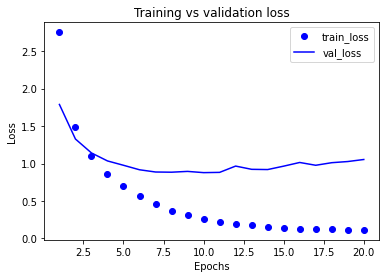

In [40]:
# Train loss vs validation loss
import matplotlib.pyplot as plt
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='train_loss')
plt.plot(epochs, val_loss_values, 'b', label='val_loss')
plt.title("Training vs validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy plot

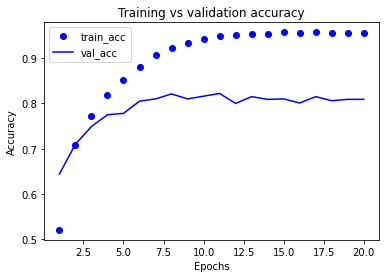

In [41]:
train_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_acc_values, 'bo', label='train_acc')
plt.plot(epochs, val_acc_values, 'b', label='val_acc')
plt.title("Training vs validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
#We will train a new model with 9-10 epochs as here with 20 model overfitting
model.fit(x_partial_train, y_partial_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.1090 - accuracy: 0.9598 - val_loss: 1.0674 - val_accuracy: 0.7960
Epoch 2/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.1097 - accuracy: 0.9565 - val_loss: 1.0929 - val_accuracy: 0.7980
Epoch 3/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.1070 - accuracy: 0.9602 - val_loss: 1.0518 - val_accuracy: 0.8080
Epoch 4/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1014 - accuracy: 0.9585 - val_loss: 1.1048 - val_accuracy: 0.8060
Epoch 5/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.0982 - accuracy: 0.9574 - val_loss: 1.1581 - val_accuracy: 0.7840
Epoch 6/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.1020 - accuracy: 0.9584 - val_loss: 1.1521 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.0985

In [44]:
#Evaluting with test data
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 86us/step


[1.4100707108063668, 0.7796081900596619]

Observation: We are geting around 78% accuracy.
Lets a create a rendom baseline model and see the accuracy

In [46]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19768477292965272

Observations: For binary classification if we randomly choose then accuracy will be 50% and here with multicalss random base line model we have 19to 20% accuracy and comapring it with our model we have 79% accuracy which is not bad.

#### Generating prediction on new data

In [47]:
predictions = model.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
# The class with the highest probablility
np.argmax(predictions[0])

3

### Experiments

#### With 128 units

In [51]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_partial_train, y_partial_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 204us/step - loss: 2.1951 - accuracy: 0.5606 - val_loss: 1.3790 - val_accuracy: 0.6910
Epoch 2/9
7982/7982 [==============================] - 1s 142us/step - loss: 1.1056 - accuracy: 0.7553 - val_loss: 1.1118 - val_accuracy: 0.7590
Epoch 3/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.7799 - accuracy: 0.8358 - val_loss: 0.9850 - val_accuracy: 0.7860
Epoch 4/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.5714 - accuracy: 0.8790 - val_loss: 0.8987 - val_accuracy: 0.8170
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.4214 - accuracy: 0.9124 - val_loss: 0.8501 - val_accuracy: 0.8230
Epoch 6/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.3145 - accuracy: 0.9334 - val_loss: 0.9241 - val_accuracy: 0.8010
Epoch 7/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.244

[1.0098506491415646, 0.7996438145637512]

Observation: We are getting little bit higher accuracy 79% e.g 2% more than previous model

#### With higher number of intermediate layers

In [52]:
model = models.Sequential()
model.add(layers.Dense(256, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_partial_train, y_partial_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 242us/step - loss: 2.1968 - accuracy: 0.5588 - val_loss: 1.3446 - val_accuracy: 0.7070
Epoch 2/9
7982/7982 [==============================] - 1s 173us/step - loss: 1.0999 - accuracy: 0.7482 - val_loss: 1.1282 - val_accuracy: 0.7420
Epoch 3/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.7727 - accuracy: 0.8226 - val_loss: 0.9741 - val_accuracy: 0.7930
Epoch 4/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.5477 - accuracy: 0.8845 - val_loss: 0.9401 - val_accuracy: 0.8160
Epoch 5/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.3618 - accuracy: 0.9231 - val_loss: 0.9060 - val_accuracy: 0.8240
Epoch 6/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.2966 - accuracy: 0.9298 - val_loss: 0.9315 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.213

[1.1648311455761442, 0.7853962779045105]

Observations: Adding more layers didnt help much as only 1% improvement noticed where in previous model we got 2% hike.